In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
% matplotlib inline

In [3]:
class SIR:
    def __init__(self, proposed_mean, proposed_std, Z_p, Z_q, mean_one, mean_two, std_one, std_two, mix_one):
        self.proposed_mean = proposed_mean
        self.proposed_std = proposed_std
        
        # parameters of target distribution
        self.mean_one = mean_one
        self.std_one = std_one
        self.mean_two = mean_two
        self.std_two = std_two
        self.mix_one = mix_one
        self.mix_two = 1.0 - self.mix_one

        self.Z_p = Z_p
        self.Z_q = Z_q
        
    def __p__(self, x):
        gaussian_one = norm.pdf(x, self.mean_one, self.std_one)
        gaussian_two = norm.pdf(x, self.mean_two, self.std_two)
        p = self.mix_one* gaussian_one + self.mix_two* gaussian_two
        return p
    
    def __p_tilde__(self, p, x):
        p = self.__p__(x)
        p_tilde = self.Z_p* p        
        return p_tilde
        
    def general_overview(self, x):
        q = norm.pdf(x, loc= self.proposed_mean, scale= self.proposed_std)
        q_tilde = self.Z_q* q
        p = self.__p__(x)
        p_tilde = self.__p_tilde__(p, x)
        
        plt.figure(figsize=(8, 8))
        plt.plot(x, q, "--", label= "proposed distribution $q$",  c= "black")
        plt.plot(x, p, "--", label= "target distribution $p$",  c= "blue")
        plt.plot(x, p_tilde, label= r"distribution $\tilde{p}$", c= "blue")
        plt.plot(x, q_tilde, label= r"distribution $\tilde{q}$",  c= "black")
        plt.xlabel("x")
        plt.legend()
        plt.tight_layout()
        
    def fit(self, num_samples):
        q_x_samples_array = np.random.normal(size= num_samples, loc=self.proposed_mean, scale= self.proposed_std)
        tilde_q_samples_array = self.Z_q* norm.pdf(q_x_samples_array, self.proposed_mean, self.proposed_std)
        tilde_p_samples_array = self.__p_tilde__(self.__p__(q_x_samples_array), q_x_samples_array)
        
        importance = (tilde_p_samples_array/tilde_q_samples_array)/ np.sum(tilde_p_samples_array/tilde_q_samples_array)
        self.samples = np.random.choice(q_x_samples_array, num_samples, p= importance)
        print importance.shape
        print q_x_samples_array.shape
        
    def samples_visualization(self, x):
        q = norm.pdf(x, loc= self.proposed_mean, scale= self.proposed_std)
        q_tilde = self.Z_q* q
        p = self.__p__(x)
        p_tilde = self.__p_tilde__(p, x)

        
        plt.figure(figsize= (8,2))
        plt.xlabel("x")
        plt.scatter(self.samples, np.zeros_like(self.samples), s= 4)

In [12]:
q_mean = 0
q_std = 1
mean_one = -5
mean_two = 5
std_one = 1
std_two = 1
Z_p = 4
Z_q = 2

sir_obj = SIR(proposed_mean= q_mean, proposed_std= q_std,
              Z_p= Z_p, Z_q= Z_q, 
              mean_one= mean_one, mean_two= mean_two, std_one= std_one, std_two= std_two, mix_one = 0.3)

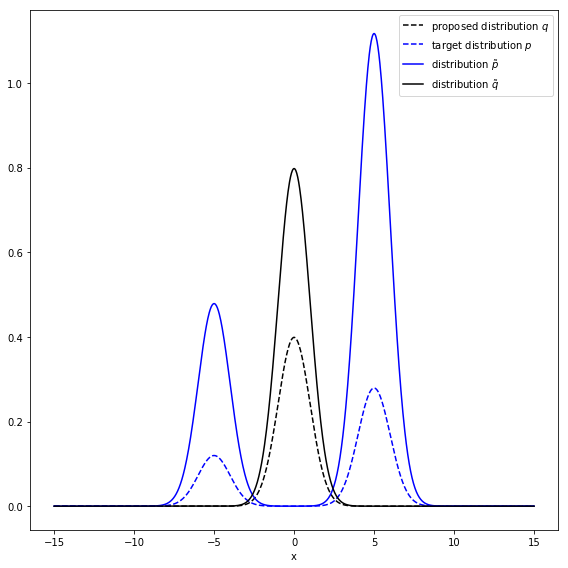

In [13]:
x = np.linspace(-15, 15, 1000)
sir_obj.general_overview(x)

In [16]:
sir_obj.fit(num_samples= 5000)

(5000,)
(5000,)


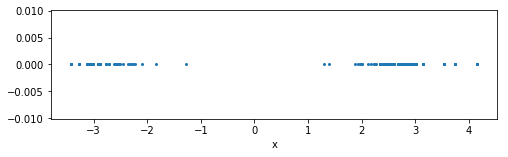

In [17]:
sir_obj.samples_visualization(x)